<a href="https://colab.research.google.com/github/ekaterine12345/HandWrittenDigits_DL/blob/main/HandWrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


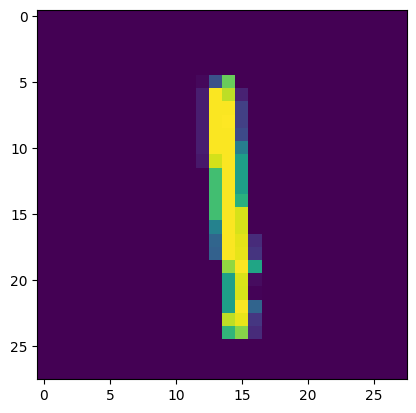

In [ ]:
plt.imshow(X_train[8])

In [ ]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



In [ ]:
# Build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
469/469 [==============================] - 12s 6ms/step - loss: 0.2926 - accuracy: 0.9097 - val_loss: 0.0747 - val_accuracy: 0.9757
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0957 - accuracy: 0.9719 - val_loss: 0.0448 - val_accuracy: 0.9847
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0695 - accuracy: 0.9794 - val_loss: 0.0351 - val_accuracy: 0.9877
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0542 - accuracy: 0.9839 - val_loss: 0.0335 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0239 - val_accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0229 - val_accuracy: 0.9921
Epoch

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.022992096841335297
Test accuracy: 0.9932000041007996


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load and preprocess an image for prediction
image = cv2.imread('/content/drive/My Drive/Colab Notebooks/hand/hand_3.png', 0) #hi6.png ha6_1.png hh6_1.png hand_1.png hand_2.png hand_0.png hand_4.png hand9.png hand_3.png hand_5.png hand_7.png hand_8.png  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
image = cv2.resize(image, (28, 28))

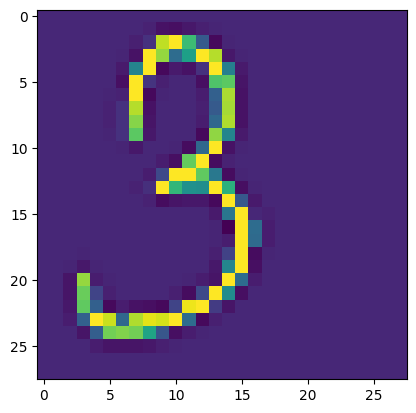

In [ ]:
plt.imshow(image)

In [ ]:
ret, image = cv2.threshold(image, 190, 255, cv2.THRESH_BINARY)
image = image.reshape(1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# Make a prediction
prediction = np.argmax(model.predict(image))
print('Predicted digit:', prediction)

1/1 [==============================] - 0s 18ms/step
Predicted digit: 3
